# k-Means
![](banner_kmeans.jpg)
_<p style="text-align: center;"> Where is the gravitational center? </p>_

In [3]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
                                
update_geom_defaults("point", list(size=6, colour="grey40"))
update_geom_defaults("text", list(hjust=0.4, vjust=0.4, colour="white"))

.................................................... start of document ....................................................

k-Means is a cluster analysis method to organize data into distinct classes.

## Introduction

As galaxies form in one part of the universe, taking in more and more stars, their gravitation centers change in location and their pull on stars around their edges change in strength.  After a while, while the number of galaxies remains the same, stars that started in one galaxy may have moved to another.  

You can think of k-means as forming galaxies or as forming clubs.  Imagine establishing a club about the wind energy industry and a club about the solar energy industry.  People in the community join the clubs in which they are more interested in.  However, many of the people interested in green energy in general are split across two different clubs.  Further, many people not interested in green energy at all are stuck in clubs with people that are.  So sometime later, a few people in the wind club that don't like green energy but do really like international trade see that there are many people in the solar club that really like international trade, so they move over to join that club.  Doing this increases the concentration of people in the wind club interested in green energy.  So in turn, the wind club looks more attractive to people in the solar club that are really interested in green energy, and they move over to join the wind club.  This goes on for a while with the clubs becoming more or less attractive to various people moving between them.  Eventually, what was the wind club has effectively become a green energy club and what was the solar energy club has become an international trade club.  In this way, people organize themselves into satisfying groups.

Not set ...

## Lesson Plan

## Terminology

Here are some new terms that we will use ion our discourse. 

* Centroid
* Dissimilarity measure

## Demonstration of Method

Here is a demonstration of the k-means method.

### Data

Consider this pedgogical 2-variable, 6-observation dataset.  The observation numbers are shown.

In [4]:
data = data.frame(x1=c(2, 2, 3, 5, 10, 12), x2=c(1, 4, 4, 4, 4, 4))
fmt(data, row.names=TRUE)

,x1,x2
1,2,1
2,2,4
3,3,4
4,5,4
5,10,4
6,12,4


### Hyperparameters

We choose to characterize dissimilarity between any pair of obervations as Euclidean distance, and between any pair of clusters as Euclidean distance between their centroids.

* **How to measure observation dissimilarity:** Euclidean distance
* **How to measure cluster dissimilarity:** Euclidean distance with centroid linkage

We choose to produce a 2-class cluster model.

* **Number of clusters:** 2

### Initialize

Randomly position the cluster centroids.

Here we see the centroid of cluster A at [x1=1, x2=3] and the centroid of cluster B at [x1=4, x2=4].

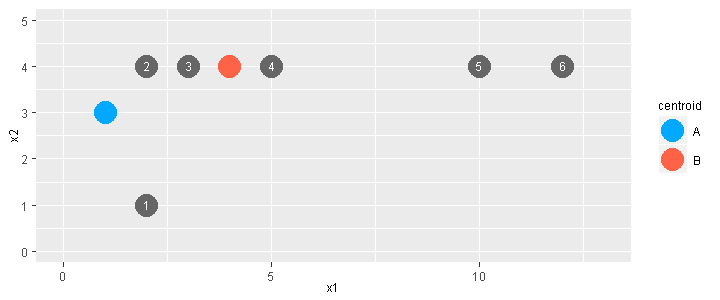

In [5]:
centroid = data.frame(x1=c(1,4), x2=c(3,4))
row.names(centroid) = c("A","B")

output_size(6,2.5)
ggplot() + xlim(0,13) + ylim(0, 5) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [6]:
layout(fmt(data, row.names=TRUE), fmt(centroid, row.names=TRUE))

,x1,x2
1,2,1
2,2,4
3,3,4
4,5,4
5,10,4
6,12,4
,x1,x2
A,1,3
B,4,4


### Re-Position Centroids

Iterate, re-positioning the cluster centroids at each step.  You can interrupt the method at the step that provides you with a satisfactory cluster model, or you can let it go until it converges on stable cluster model.

**Step 1**

Calculate distances from the observations to the centroids.  Tentatively assign each observation to the cluster associated with its nearest centroid.

Here we see that observations 1 and 2 are closer to centroid A than they are to centroid B, so those observations are tentatively assigned to cluster A.  Similarly for and observations 3, 4, 5, and 6 tentatively assigned to cluster B.   

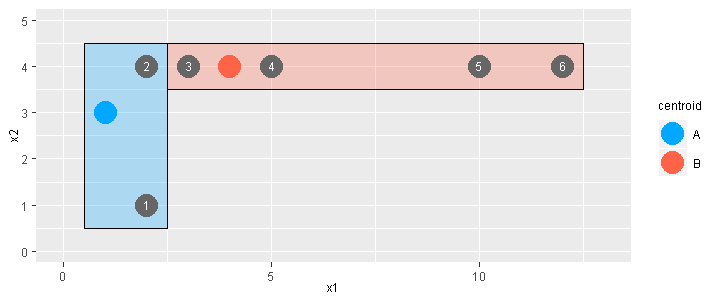

In [5]:
output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=0.5, xmax=2.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=2.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [7]:
data$class = c("A","A","B","B","B","B")

distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
layout(fmt(data, row.names=TRUE),
       fmt(centroid, row.names=TRUE),
       fmt(distance, "distance to centroid", row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 B 
 
 
 4 
 5 
 4 
 B 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 1 
 3 
 
 
 B 
 4 
 4 
 
 
 
 distance to centroid 
 
 
 
 A 
 B 
 
 
 
 
 1 
 2.236068 
 3.605551 
 
 
 2 
 1.414214 
 2.000000 
 
 
 3 
 2.236068 
 1.000000 
 
 
 4 
 4.123106 
 1.000000 
 
 
 5 
 9.055385 
 6.000000 
 
 
 6 
 11.045361 
 8.000000

Re-position cluster centroids based on their observations.

Here we see centroid A re-positioned at [x1=2.0, x2=2.5] based on observations 1 and 2.  Similarly, centroid B is re-positioned at [x1=7.5, x2=4.0] based on observations 3, 4, 5, and 6.

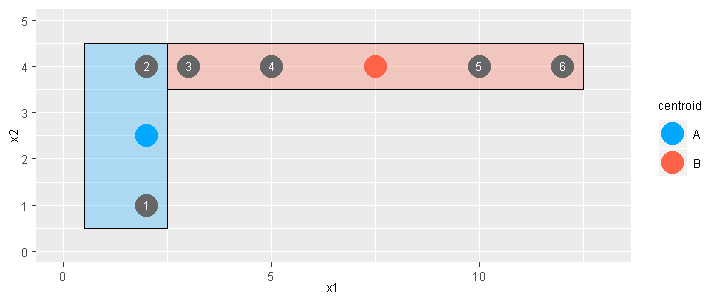

In [8]:
centroid$x1 = c(mean(data$x1[data$class=="A"]), mean(data$x1[data$class=="B"]))
centroid$x2 = c(mean(data$x2[data$class=="A"]), mean(data$x2[data$class=="B"]))

output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=0.5, xmax=2.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=2.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [9]:
distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
layout(fmt(data, row.names=TRUE),
       fmt(centroid, row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 B 
 
 
 4 
 5 
 4 
 B 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 2.0 
 2.5 
 
 
 B 
 7.5 
 4.0

**Step 2**

Calculate distances from the observations to the centroids.  Tentatively assign each observation to the cluster associated with its nearest centroid.  Note that the observations do not change position, but some may change class.

Here we see that observations 1, 2, and 3 are closer to centroid A than they are to centroid B, so those observations are tentatively assigned to cluster A.  Similarly for and observations 4, 5, and 6 tentatively assigned to cluster B. 

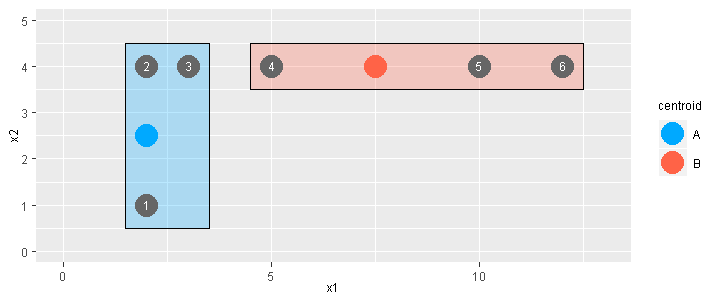

In [10]:
output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=3.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=4.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [11]:
data$class = c("A","A","A","B","B","B")

distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
layout(fmt(data, row.names=TRUE),
       fmt(centroid, row.names=TRUE),
       fmt(distance, "distance to centroid", row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 B 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 2.0 
 2.5 
 
 
 B 
 7.5 
 4.0 
 
 
 
 distance to centroid 
 
 
 
 A 
 B 
 
 
 
 
 1 
 1.500000 
 6.264982 
 
 
 2 
 1.500000 
 5.500000 
 
 
 3 
 1.802776 
 4.500000 
 
 
 4 
 3.354102 
 2.500000 
 
 
 5 
 8.139410 
 2.500000 
 
 
 6 
 10.111874 
 4.500000

Re-position cluster centroids based on their observations.

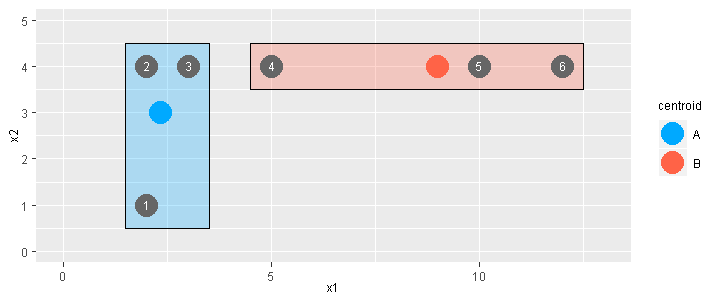

In [12]:
centroid$x1 = c(mean(data$x1[data$class=="A"]), mean(data$x1[data$class=="B"]))
centroid$x2 = c(mean(data$x2[data$class=="A"]), mean(data$x2[data$class=="B"]))

output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=3.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=4.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [13]:
distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
layout(fmt(data, row.names=TRUE),
       fmt(centroid, row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 B 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 2.333333 
 3 
 
 
 B 
 9.000000 
 4

**Step 3**

Calculate distances from the observations to the centroids.  Tentatively assign each observation to the cluster associated with its nearest centroid.

Here we see that observations 1, 2, 3, and 4 are closer to centroid A than they are to centroid B, so those observations are tentatively assigned to cluster A.  Similarly for and observations 5 and 6 tentatively assigned to cluster B. 

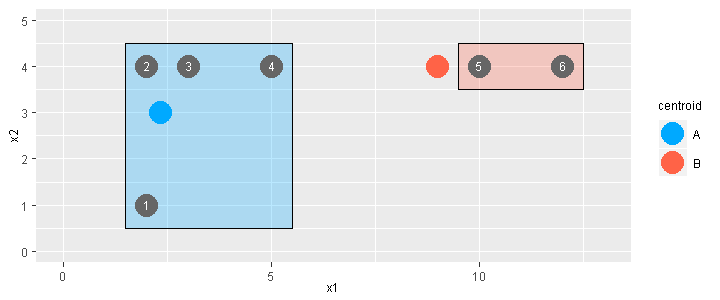

In [14]:
output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=5.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=9.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [15]:
data$class = c("A","A","A","A","B","B")

distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
layout(fmt(data, row.names=TRUE),
       fmt(centroid, row.names=TRUE),
       fmt(distance, "distance to centroid", row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 A 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 2.333333 
 3 
 
 
 B 
 9.000000 
 4 
 
 
 
 distance to centroid 
 
 
 
 A 
 B 
 
 
 
 
 1 
 2.027588 
 7.615773 
 
 
 2 
 1.054093 
 7.000000 
 
 
 3 
 1.201850 
 6.000000 
 
 
 4 
 2.848001 
 4.000000 
 
 
 5 
 7.731609 
 1.000000 
 
 
 6 
 9.718253 
 3.000000

Re-position cluster centroids based on their observations.

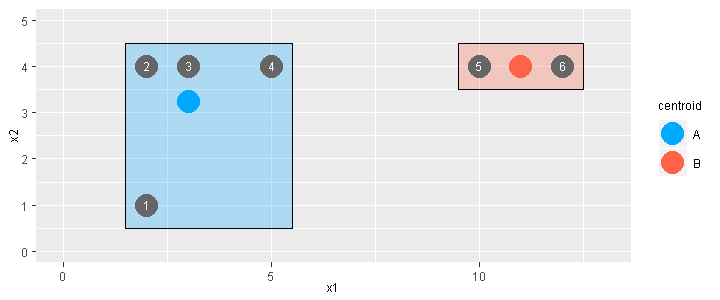

In [16]:
centroid$x1 = c(mean(data$x1[data$class=="A"]), mean(data$x1[data$class=="B"]))
centroid$x2 = c(mean(data$x2[data$class=="A"]), mean(data$x2[data$class=="B"]))

output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=5.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=9.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [17]:
distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
layout(fmt(data, row.names=TRUE), fmt(centroid, row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 A 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 3 
 3.25 
 
 
 B 
 11 
 4.00

**Step 4**

Calculate distances from the observations to the centroids.  Tentatively assign each observation to the cluster associated with its nearest centroid.  At this step, there is no change is cluster assignments, so centroids would not change in any subsequent steps.

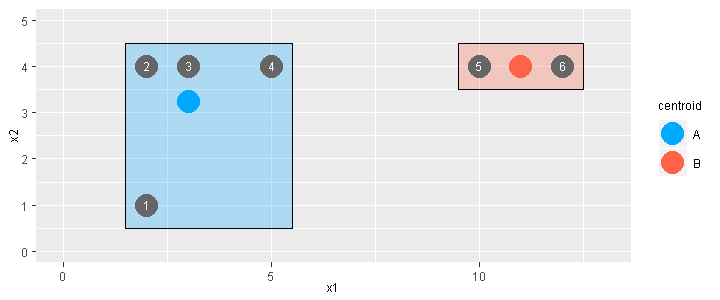

In [18]:
output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=5.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=9.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [19]:
data$class = c("A","A","A","A","B","B")

distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
layout(fmt(data, row.names=TRUE),
       fmt(centroid, row.names=TRUE),
       fmt(distance, "distance to centroid", row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 A 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 3 
 3.25 
 
 
 B 
 11 
 4.00 
 
 
 
 distance to centroid 
 
 
 
 A 
 B 
 
 
 
 
 1 
 2.462214 
 9.486833 
 
 
 2 
 1.250000 
 9.000000 
 
 
 3 
 0.750000 
 8.000000 
 
 
 4 
 2.136001 
 6.000000 
 
 
 5 
 7.040064 
 1.000000 
 
 
 6 
 9.031196 
 1.000000

### Commit Cluster Assignments

We have converged on a stable cluster model and commit cluster assignments accordingly.

Here we see the resulting cluster model.

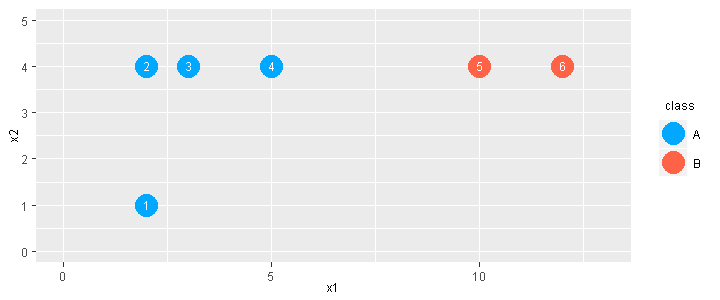

In [22]:
output_size(6,2.5)
ggplot() + xlim(0,13) + ylim(0, 5) +
geom_point(aes(x=x1, y=x2, color=class), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
theme.legend_title

In [24]:
fmt(data, title="cluster model", row.names=TRUE)

,x1,x2,class
1,2,1,A
2,2,4,A
3,3,4,A
4,5,4,A
5,10,4,B
6,12,4,B


## Code

### Useful Functions

In [21]:
# help(kmeans)       # from stats library
# help(scale)        # from base library

### Templates

In [35]:
# Construct cluster model using k-means

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
datax.norm = scale(datax)

number_of_clusters = 5

set.seed(12345)
datax$cluster = kmeans(datax.norm, number_of_clusters, nstart=1000)$cluster
fmt(datax, "Cluster Model by k-Means")

x1,x2,x3,cluster
2.0,3.5,10.0,5
2.5,9.0,9.0,1
4.0,8.5,10.5,1
6.5,11.0,2.0,4
8.0,2.5,1.5,2
9.0,1.0,1.0,2
10.0,4.0,9.5,3
10.5,7.5,11.0,3


## What You Should Now Know

* How to construct a cluster model using kmeans, using R.


## Further Reading

* http://shabal.in/visuals/kmeans/3.html

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised February 18, 2021
</span>
</p>